ML Assignment Que 1 (192CD009)

Importing IRIS dataset

In [0]:
import numpy as np
import pandas as pd

In [0]:
dataset = pd.read_csv('/content/iris.csv')

In [136]:
dataset.shape
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [137]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [0]:
feature_columns = ['sepal_length','sepal_width','petal_length','petal_width']

In [0]:
X = dataset[feature_columns].values

In [0]:
y = dataset['species'].values

Label Encoder

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
y = le.fit_transform(y)

Training Set , Cross Validation and Test Set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Data Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
%matplotlib inline

Parallel Co-ords

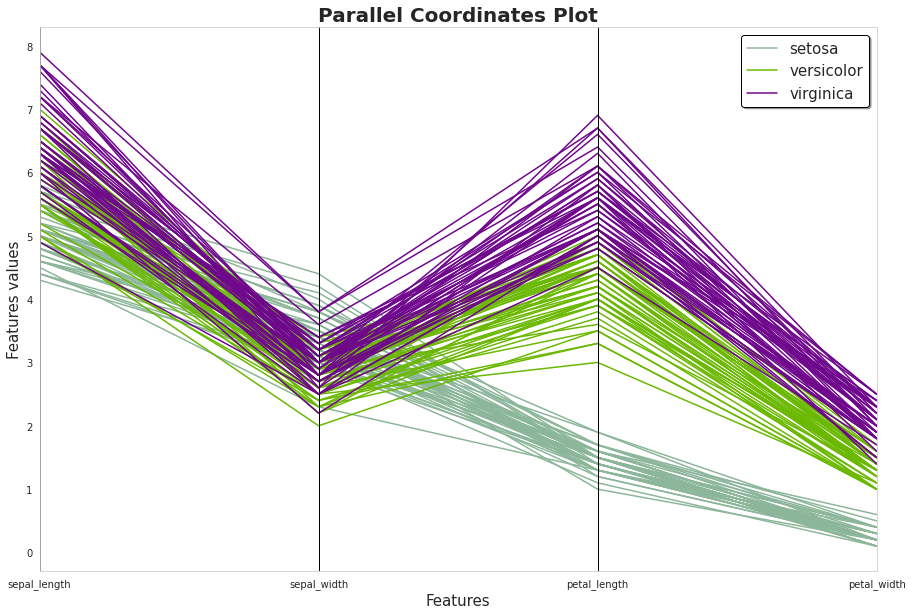

In [147]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset,"species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Andrews Curves Plot

<function matplotlib.pyplot.show>

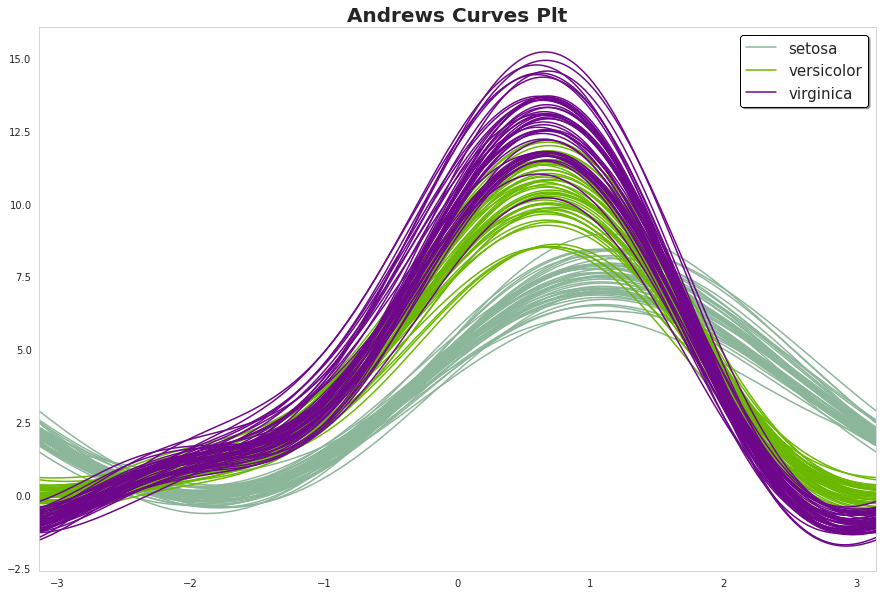

In [148]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset,"species")
plt.title('Andrews Curves Plt',fontsize=20,fontweight = 'bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show

Pairwise

<Figure size 432x288 with 0 Axes>

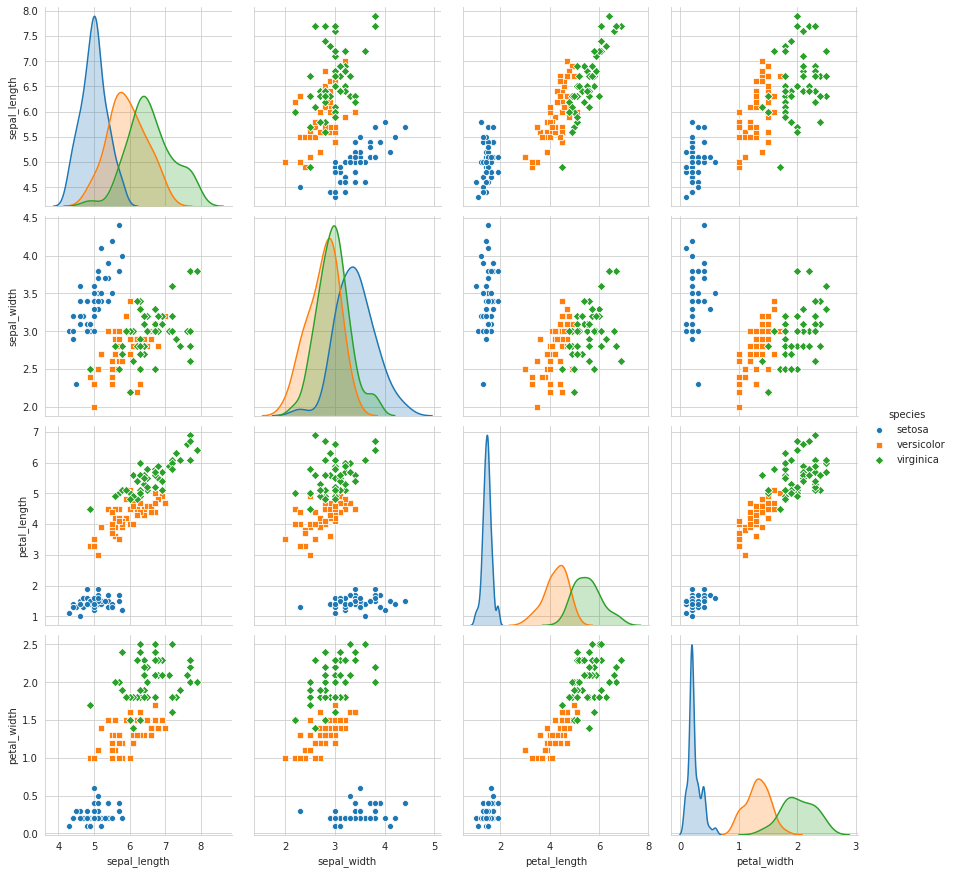

In [149]:
plt.figure()
sns.pairplot(dataset, hue = "species", height=3, markers=["o", "s", "D"])
plt.show()

Boxplot

<Figure size 432x288 with 0 Axes>

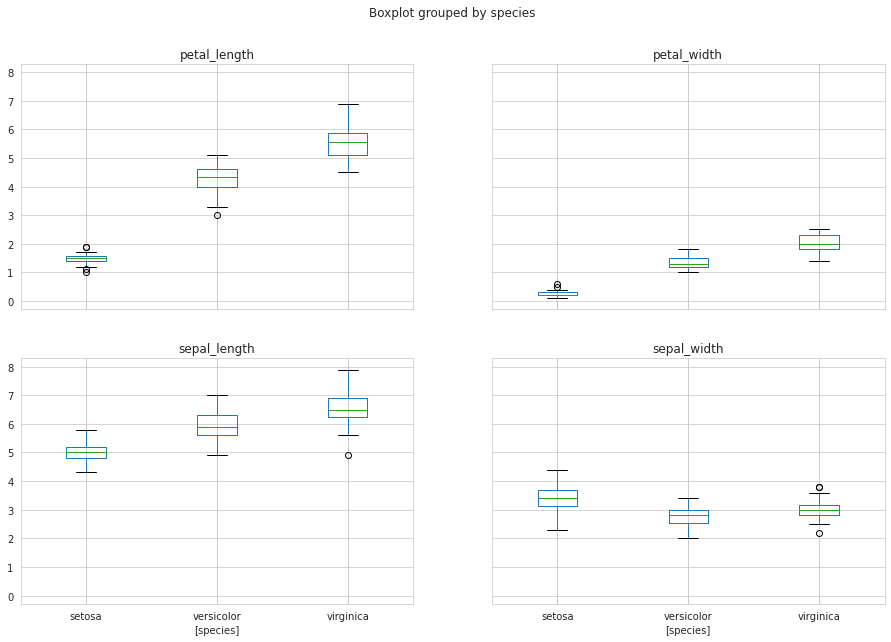

In [150]:
plt.figure()
dataset.boxplot(by="species", figsize=(15, 10))
plt.show()

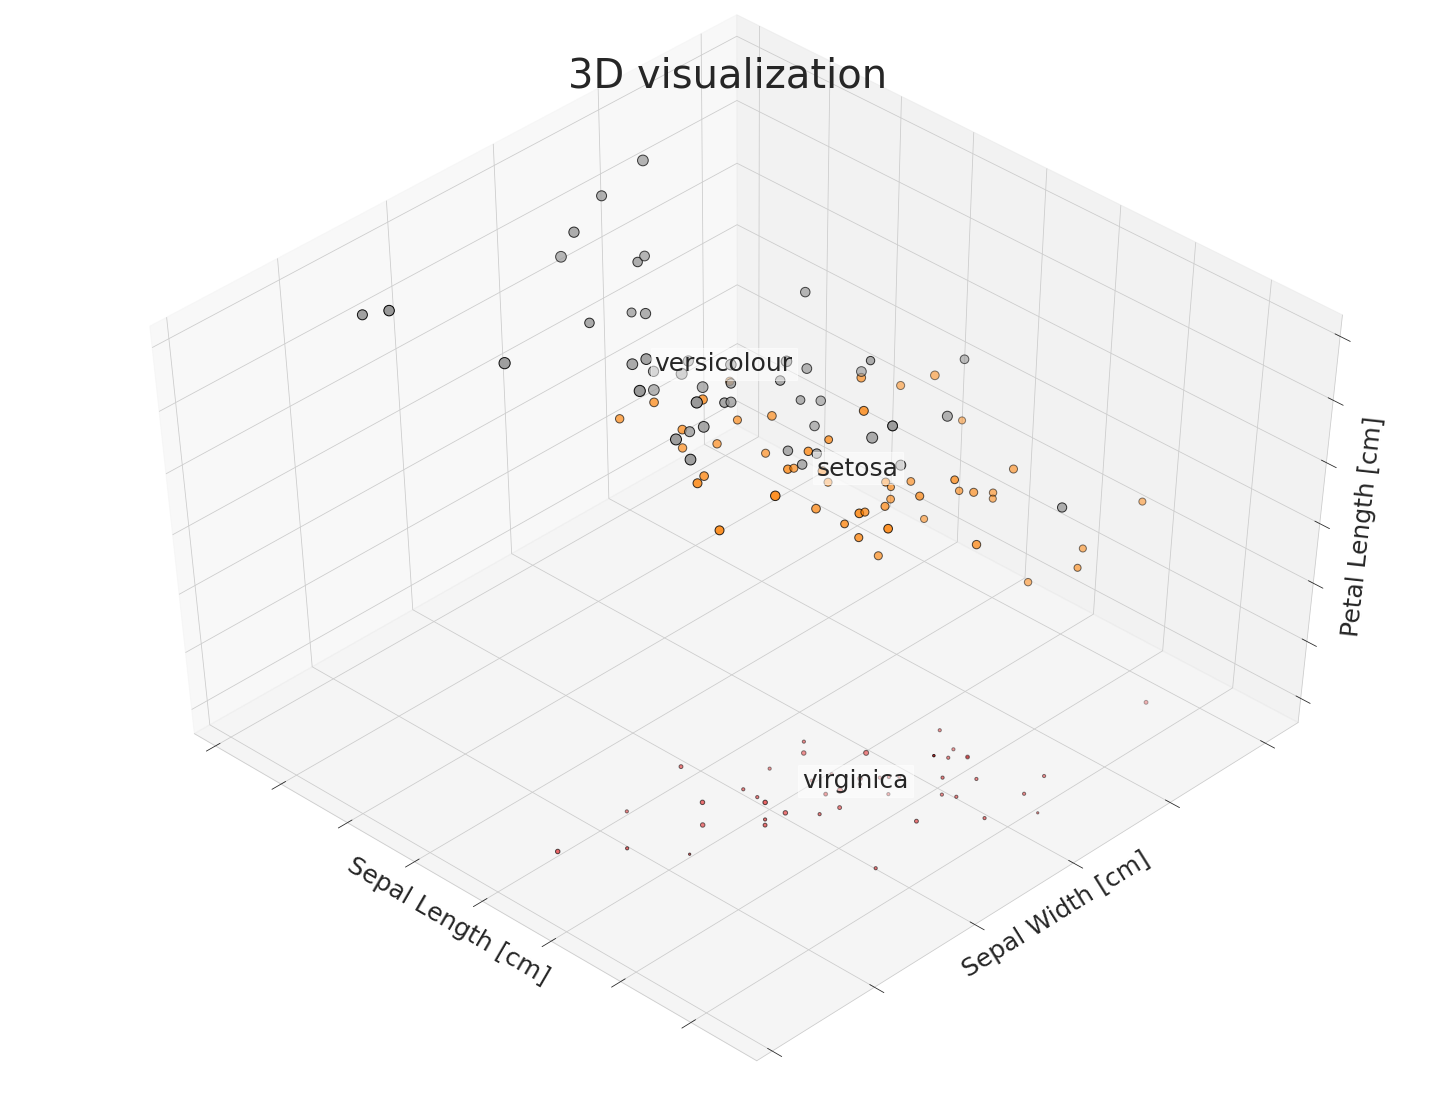

In [151]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('virginica', 0), ('setosa', 1), ('versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

Using KNN for Classification





Making Predicitons

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

#--learning model with k=3 ,k=5 and k=9--(first with 3)

classifier = KNeighborsClassifier(n_neighbors =3)
 
#--fitting the model--

classifier.fit(X_train,y_train)
 
#--predicting the Test set results--

y_pred = classifier.predict(X_test)


In [153]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating Accuracy

In [154]:
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


Cross-Validation for parameter tuning (testing with k = 3,5 and 9)

In [0]:
k_list = list([3,5,9])
cv_scores = []
cv_accuracies = []

In [0]:
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores = cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())
  accuracy = accuracy_score(y_test,y_pred)*100
  cv_accuracies.append(accuracy)

<Figure size 432x288 with 0 Axes>

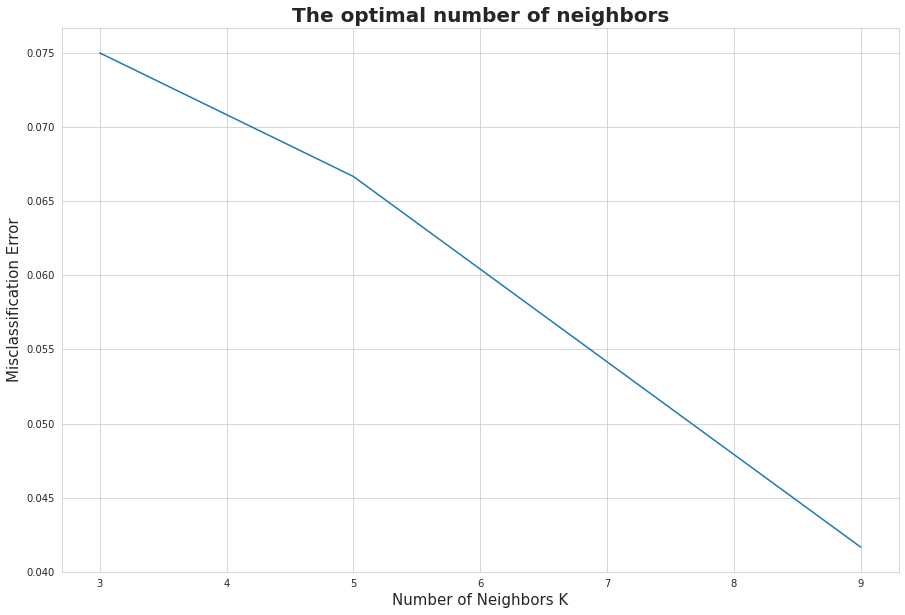

In [157]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors wrt MSE', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

<Figure size 432x288 with 0 Axes>

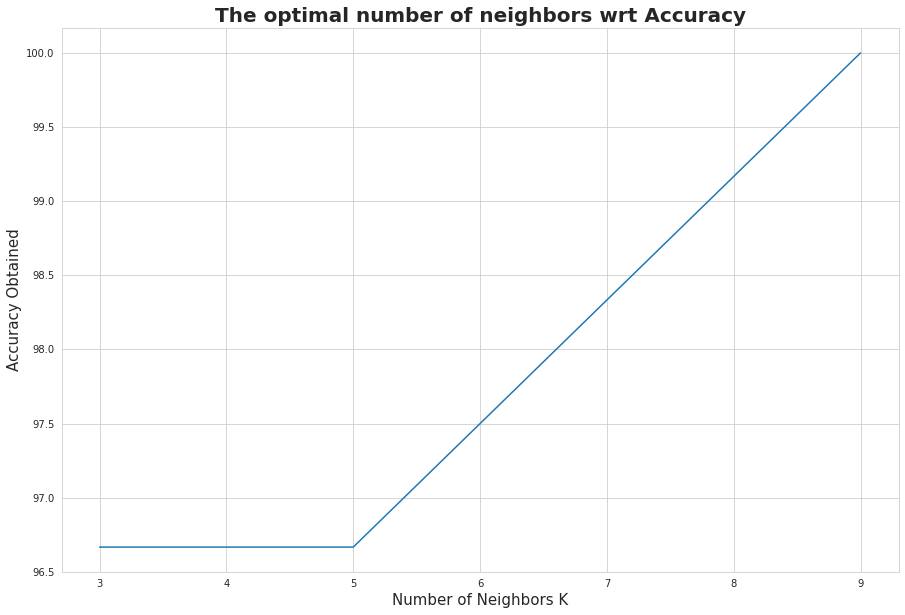

In [159]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors wrt Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy Obtained', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, cv_accuracies)

plt.show()

Finding Best K

In [160]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
